In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('data.xlsx')

In [ ]:
df.head()

In [ ]:
df.head(2)

In [ ]:
df.tail()

In [ ]:
df.loc[515:535]

In [ ]:
df.info()

In [ ]:
df.describe(include='object')

In [ ]:
df['Nationality ']

In [ ]:
df['Position'] #works every time

In [ ]:
df.Position #but if there are space in the column name, this won't work

In [ ]:
df.columns

In [ ]:
df[['Position','Player Name ']]

In [ ]:
df[['Player Name ', 'Goals Scored ','Nationality ']]

fixing the names

In [ ]:
df.columns.tolist()

In [ ]:
list(map(lambda col: col.strip().lower(), df.columns.tolist()))

In [ ]:
df.columns = list(map(lambda col: col.strip().lower(), df.columns.tolist()))

In [ ]:
df.columns

In [ ]:
df['goals scored'].replace("-", 0, inplace=True)

In [ ]:
df

In [ ]:
df['goals scored'].value_counts()

In [ ]:
import numpy as np

In [ ]:
df['goals scored']= df['goals scored'].replace('N.A', np.nan)
df['goals scored']= df['goals scored'].replace('N,A', np.nan)


In [ ]:
df['goals scored'].value_counts()

In [ ]:
df['goals scored'].value_counts().plot(
    kind='bar',
    title='Goals Scored'
)

In [ ]:
df.columns

In [ ]:
df['goals scored']

In [ ]:
df=df.sort_values(by='goals scored', ascending=False)

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 6))
bars=plt.bar(x='player name', height='goals scored',color='red',hatch='x',edgecolor='black',data=df.head(10))
for bar,nation in zip(bars,df.head(10).nationality):
    yval=bar.get_height()
    plt.text(x=bar.get_x(),
             y=yval+.1,
             s=nation,
             fontdict={'size':6},
             )
    
plt.xticks(rotation=45)
plt.title('Top 10 Goal Scorers in 2022')
plt.show()

In [ ]:
df.head(15)[::-1].plot(kind='barh', x='player name',
                       y='goals scored')


In [ ]:
df.head(10)[::-1].plot(kind='barh', x='player name',
                y=['goals scored','assists provided'],
                stacked=True)

<Axes: ylabel='count'>

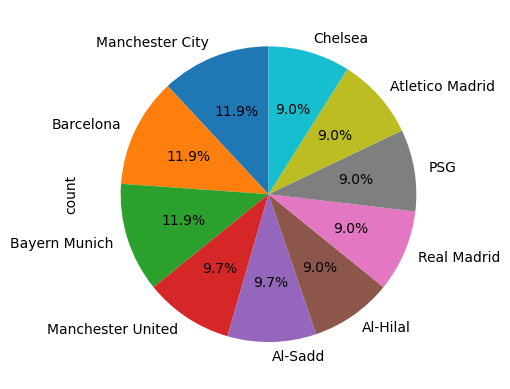

In [155]:
df['club'].value_counts().head(10).plot(kind='pie',
                                       color='orange',
                                       autopct='%.1f%%',
                                       startangle=90,)

<Axes: xlabel='club'>

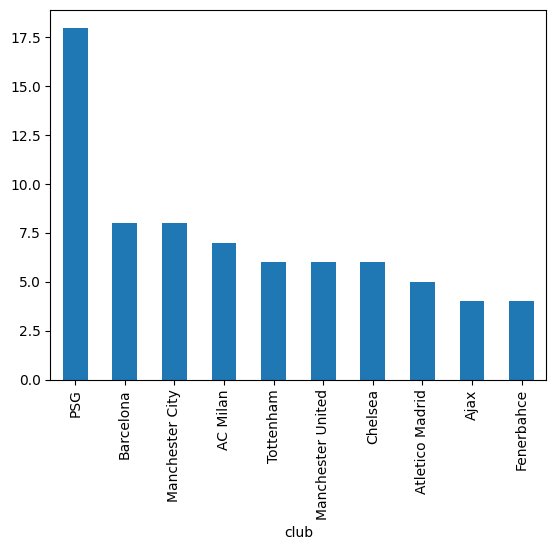

In [153]:
df.groupby('club')['goals scored'].sum().sort_values(
    ascending=False).head(10).plot(kind='bar')


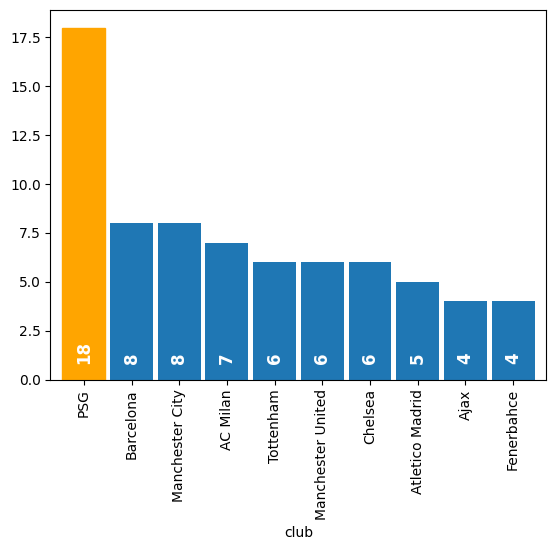

In [157]:
bars=df.groupby('club')['goals scored'].sum().sort_values(
    ascending=False).head(10).plot(kind='bar',width=.9)
bars.patches[0].set_color('orange')
for bar in bars.patches:
    yval=bar.get_height()
    plt.text(x=bar.get_x() +bar.get_width()/2,
            y=1,
            s=f"{int(yval)}",
            ha='center',
            fontdict={'size':12,'color':'white',
                       'weight':'bold'},
            rotation=90,
            )